In [9]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [10]:
# Step 2: Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [11]:
# Step 3: Preprocess data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
# Step 4: Load Pre-trained CNN (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
print("\nLoaded VGG16 base model")



Loaded VGG16 base model


In [13]:
# Step 5: Freeze lower layers
for layer in base_model.layers:
    layer.trainable = False
print("Frozen base model layers")


Frozen base model layers


In [14]:
# Step 6: Add custom classifier layers on top
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

In [7]:
# Step 7: Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# Step 8: Train classifier layers
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 68s 95ms/step - accuracy: 0.4255 - loss: 1.6362 - val_accuracy: 0.5496 - val_loss: 1.3196
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 66s 94ms/step - accuracy: 0.5219 - loss: 1.3672 - val_accuracy: 0.5788 - val_loss: 1.2310
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 67s 95ms/step - accuracy: 0.5528 - loss: 1.2903 - val_accuracy: 0.5896 - val_loss: 1.1941
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 66s 94ms/step - accuracy: 0.5659 - loss: 1.2485 - val_accuracy: 0.5900 - val_loss: 1.1569
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 67s 95ms/step - accuracy: 0.5739 - loss: 1.2216 - val_accuracy: 0.5972 - val_loss: 1.1427


In [18]:
# Step 9: Evaluate model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.0929 - loss: 2.5355

✅ Test Accuracy: 0.0929


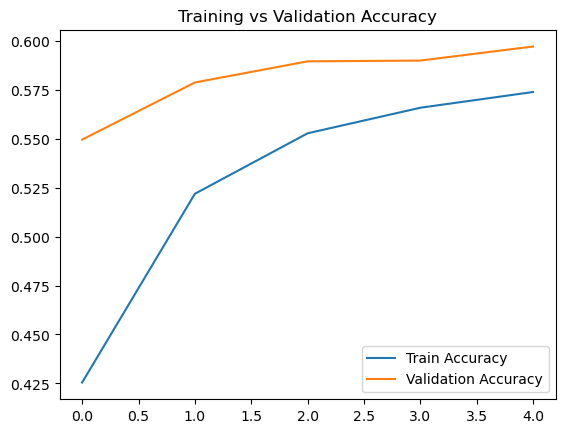

In [19]:
# Step 10: Visualize training progress
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [20]:
# Step 11: Fine-tune (optional)
# Unfreeze some deeper layers and train with a smaller learning rate
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

fine_tune_history = model.fit(
    X_train, y_train,
    epochs=2,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


Epoch 1/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 105s 147ms/step - accuracy: 0.4231 - loss: 1.6380 - val_accuracy: 0.6246 - val_loss: 1.1077
Epoch 2/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 104s 148ms/step - accuracy: 0.6062 - loss: 1.1511 - val_accuracy: 0.6666 - val_loss: 0.9594
